In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

#lines 7 and 8 make the code run on Kolton's laptop
import os
os.environ["PROJ_LIB"] ="C:/Users/kolto/Anaconda3/Library/share"; #fixr

from mpl_toolkits.basemap import Basemap
import pickle


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [15]:
# Load in hurricane data
atlantic = np.load("../Data/atlantic_series.pickle",allow_pickle=True)
pacific = np.load("../Data/pacific_series.pickle",allow_pickle=True)

In [16]:
# Getting indices of longest hurricanes, for a more interesting plot

at_lens = []
for a in atlantic:
    at_lens.append(len(a))

a_longest = np.where(np.array(at_lens) > 77)[0]

pc_lens = []
for p in pacific:
    pc_lens.append(len(p))

p_longest = np.where(np.array(pc_lens) > 70)[0]

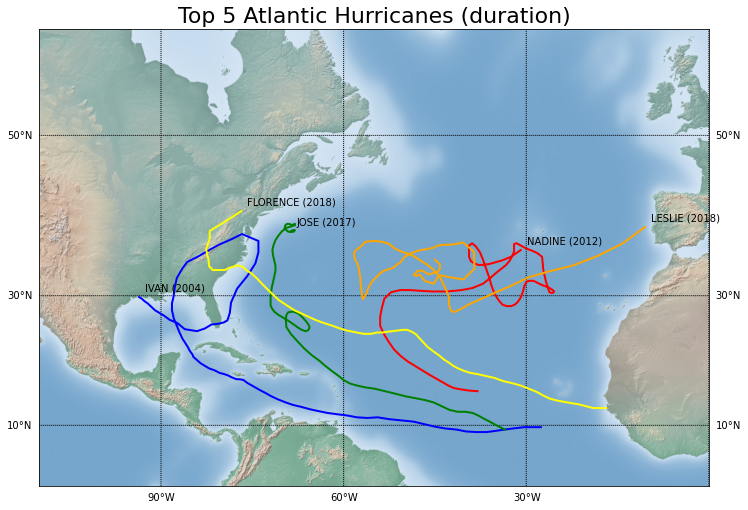

In [16]:
n = 5 # Number of hurricanes

# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))

# Set up the map and the longitude-latitude window
m = Basemap(llcrnrlon=-110.,llcrnrlat=0.,urcrnrlon=0.,urcrnrlat=60.,
            rsphere=(6378137.00,6356752.3142),
            resolution=None,
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)


#m.bluemarble() # Plot the pretty NASA picture
m.shadedrelief() #Plot a translucent relief map 
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

colors = ['blue','red','green','yellow','orange','lime','pink','purple','cyan','brown']

# Plot the trajectories
for i in range(n):
    j = i
    i = a_longest[i]
    year = atlantic[i]['Date'].values[0][-4:]
    name = atlantic[i]['Time'].values[0].strip()
    lat = atlantic[i]["Latitude"][1:].values
    long = -atlantic[i]["Longitude"][1:].values # Make sure the longitude
    xpt, ypt = m(long, lat)
    plt.text(xpt[len(lat) - 1]+100000,ypt[len(long) - 1]+100000, f'{name} ({year})', color='k')
    m.plot(xpt, ypt, linewidth=2, color=colors[j])
    
plt.title('Top 5 Atlantic Hurricanes (duration)', fontsize=22)
plt.savefig('atlantic_hurricanes')
plt.show()

C:\Users\kolto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


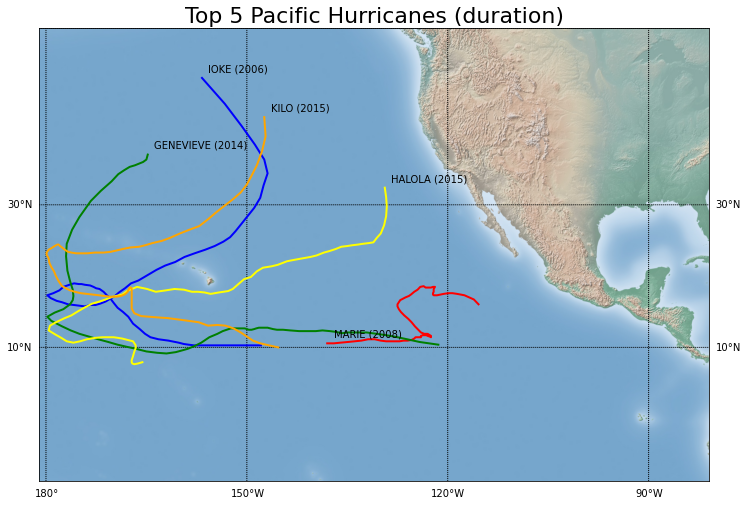

In [17]:
n = 5 # Number of hurricanes

# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))
m = Basemap(llcrnrlon=-181.,llcrnrlat=-10.,urcrnrlon=-81.,urcrnrlat=50.,
            rsphere=(6378137.00,6356752.3142),
            resolution='h',
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
#m.bluemarble() #Pretty NASA picture
# m.fillcontinents(color='#D3D3D3')

m.shadedrelief() #Plot a translucent relief map 

m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

colors = ['blue','red','green','yellow','orange','lime','pink','purple','cyan','brown']

for i in range(n):
    j = i
    i = p_longest[i]
    year = pacific[i]['Date'].values[0][-4:]
    name = pacific[i]['Time'].values[0].strip()
    lat = pacific[i]["Latitude"][1:].values
    long = -pacific[i]["Longitude"][1:].values # Make sure the longitude
    xpt, ypt = m(long, lat)
    plt.text(xpt[len(lat) - 1]+100000,ypt[len(long) - 1]+100000, f'{name} ({year})', color='k')
    m.plot(xpt, ypt, linewidth=2, color=colors[j], label=f'{name} ({year})')
#     plt.plot(xpt[-1],ypt[-1],'*',color=colors[i-8])
# plt.legend()
    
plt.title('Top 5 Pacific Hurricanes (duration)', fontsize=22)
plt.savefig('pacific_hurricanes')
plt.show()

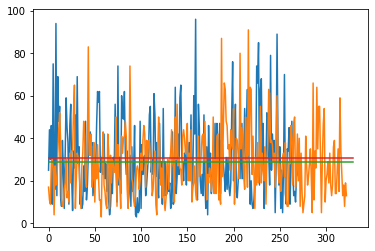

In [171]:
plt.plot([len(a) for a in atlantic])
plt.plot([len(a) for a in pacific])
plt.plot(np.ones(330)*np.mean([len(a) for a in pacific]))
plt.plot(np.ones(330)*np.mean([len(a) for a in atlantic]))

In [8]:
# huricane Bonnie 
bonnie = np.load("hurricane_bonnie",allow_pickle=True)
print(bonnie)

(array([38, 39, 40, 41, 42], dtype=int64), [30.2, 31.9, 33.5, 35.5, 37.1])


C:\Users\kolto\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


[4025958.7386096  3961577.35885227 3895518.11916113 3828806.54019113
 3763304.49868657 3700430.16484552 3641650.47134517 3588072.02701667
 3540547.63958764 3499555.47577731 3465242.79923805 3437424.58269425
 3415641.61269637 3399214.93647141] [2613028.71285885 2659234.83515092 2709876.96710813 2761058.19401526
 2809588.4129544  2852538.82000335 2887766.59410535 2913832.98530138
 2930139.07189868 2936843.10071904 2934798.30941975 2925402.17053577
 2910437.86240777 2891891.52906457]


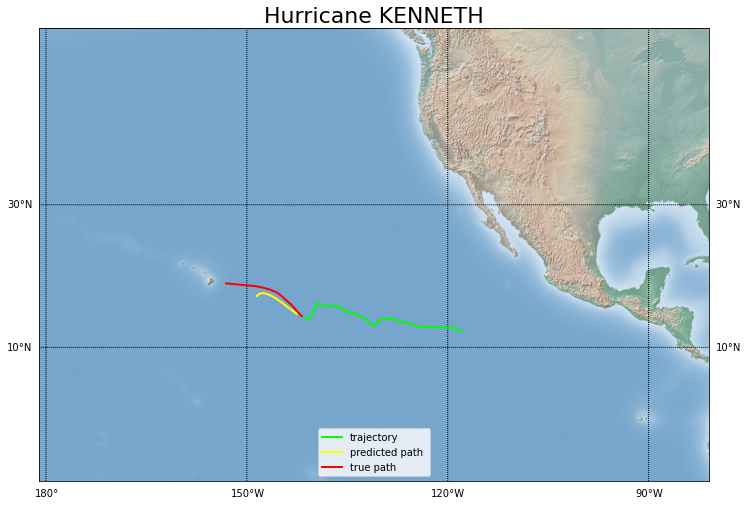

In [34]:
#Karina, Celia, Guillermo 
Karina = np.load("../Data/VARMAX_KENNETH.pickle",allow_pickle=True)
name = Karina["Hurricane Name"]
lat = Karina['Observed Points'][:, 0]
long = -1*Karina['Observed Points'][:, 1]
true_lat = Karina['True Trajectory'][:,0]
true_long = -1*Karina['True Trajectory'][:, 1]
pred_lat = Karina["Predicted Trajectory"][:,0]
pred_long = -1*Karina["Predicted Trajectory"][:,1]
params = Karina["Model Parameters (p, q)"]

n = 1 # Number of hurricanes

# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))
m = Basemap(llcrnrlon=-181.,llcrnrlat=-10.,urcrnrlon=-81.,urcrnrlat=50.,
            rsphere=(6378137.00,6356752.3142),
            resolution='h',
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
#m.bluemarble() #Pretty NASA picture
# m.fillcontinents(color='#D3D3D3')

m.shadedrelief() #Plot a translucent relief map 

m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

xpt, ypt = m(long, lat)
#plt.text(xpt[len(lat) - 1]+100000,ypt[len(long) - 1]+100000, f'{name} ({year})', color='k')
m.plot(xpt, ypt, linewidth=2, color='lime', label="trajectory")

xpt, ypt = m(pred_long, pred_lat)
#plt.text(xpt[len(pred_lat) - 1]+100000,ypt[len(pred_long) - 1]+100000, f'{name} ({year})', color='k')
m.plot(xpt, ypt, linewidth=2, color='yellow', label="predicted path ")
print(xpt, ypt)

xpt, ypt = m(true_long, true_lat)
m.plot(xpt, ypt, linewidth=2, color='red', label="true path")

    
plt.title('Hurricane KENNETH', fontsize=22)
plt.legend()
plt.savefig('KENNETH')
plt.show()

C:\Users\kolto\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


[5544151.52211102 5493430.44415362 5442196.66568447 5390790.42365663
 5340325.04196463 5291504.80491411 5245182.63494464 5202010.19999819
 5162573.46580339 5127278.74162778 5096381.78852805 5069957.01945898
 5047915.76434303 5030015.65461459] [10220107.18525997 10265981.11985107 10316148.93373067 10366731.41212989
 10414580.19324038 10456833.01855683 10491421.07067127 10516974.27782309
 10532941.91187772 10539502.87177852 10537501.96059614 10528304.72044023
 10513647.93222561 10495467.0652921 ]


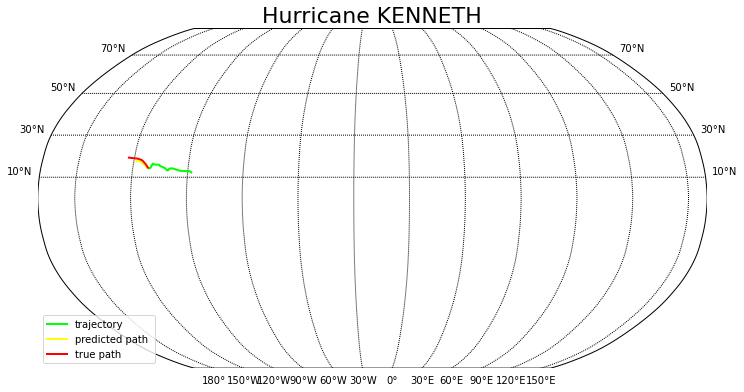

In [35]:
#Karina, Celia, Guillermo 
Karina = np.load("../Data/VARMAX_KENNETH.pickle",allow_pickle=True)
name = Karina["Hurricane Name"]
lat = Karina['Observed Points'][:, 0]
long = -1*Karina['Observed Points'][:, 1]
true_lat = Karina['True Trajectory'][:,0]
true_long = -1*Karina['True Trajectory'][:, 1]
pred_lat = Karina["Predicted Trajectory"][:,0]
pred_long = -1*Karina["Predicted Trajectory"][:,1]
params = Karina["Model Parameters (p, q)"]

n = 1 # Number of hurricanes

# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))
m = Basemap(llcrnrlon=-181.,llcrnrlat=-10.,urcrnrlon=-81.,urcrnrlat=50.,
            rsphere=(6378137.00,6356752.3142),
            resolution='h',
            projection='robin',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
#m.bluemarble() #Pretty NASA picture
# m.fillcontinents(color='#D3D3D3')

m.shadedrelief() #Plot a translucent relief map 

m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

xpt, ypt = m(long, lat)
#plt.text(xpt[len(lat) - 1]+100000,ypt[len(long) - 1]+100000, f'{name} ({year})', color='k')
m.plot(xpt, ypt, linewidth=2, color='lime', label="trajectory")

xpt, ypt = m(pred_long, pred_lat)
#plt.text(xpt[len(pred_lat) - 1]+100000,ypt[len(pred_long) - 1]+100000, f'{name} ({year})', color='k')
m.plot(xpt, ypt, linewidth=2, color='yellow', label="predicted path ")
print(xpt, ypt)

xpt, ypt = m(true_long, true_lat)
m.plot(xpt, ypt, linewidth=2, color='red', label="true path")

    
plt.title('Hurricane KENNETH', fontsize=22)
plt.legend()
plt.savefig('KENNETH')
plt.show()

In [22]:
#Karina, Celia, Guillermo 
Karina = np.load("../Data/NO_REG_VARMAX_             KARINA.pickle",allow_pickle=True)
name = Karina["Hurricane Name"]
lat = Karina['Observed Points'][:, 0]
long = -1*Karina['Observed Points'][:, 1]
true_lat = Karina['True Trajectory'][:,0]
true_long = -1*Karina['True Trajectory'][:, 1]
pred_lat = Karina["Predicted Trajectory"][:,0]
pred_long = -1*Karina["Predicted Trajectory"][:,1]

In [23]:
pred_lat

array([ 34.77129039,  33.64909484,  33.62658792,  31.56310424,
        29.85528886,  26.64261217,  24.00676281,  19.48174189,
        15.69128807,  10.38105838,   5.64718687,  -0.51586376,
        -5.82030358, -12.47045765, -18.23781547, -25.07941763])

In [24]:
pred_long

array([-157.63921644, -154.70632605, -153.65174016, -149.74858347,
       -146.33671702, -140.64283188, -136.0567956 , -128.5763095 ,
       -122.22124706, -113.63865176, -105.99202319,  -96.11152427,
        -87.60135207,  -77.04271996,  -67.81546836,  -56.92045707])

In [25]:
xpt

array([2448741.81965279, 2459206.52828379, 2469671.23691478,
       2490600.65417677, 2511530.07143876, 2532459.48870075,
       2553388.90596274, 2584783.03185572, 2637106.5750107 ,
       2731288.95268965])

In [26]:
ypt

array([4847473.15220328, 4948841.48296886, 5012706.39691208,
       5064088.60538663, 5115734.40369343, 5167649.04005151,
       5219837.87042692, 5272306.3619697 , 5351545.70666486,
       5444828.64373961])